___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
!pip install plotly

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_f=pd.read_csv("solder_female_Public.csv")
df_m=pd.read_csv("solder_male_public.csv",encoding="latin-1")

In [4]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [5]:
df=pd.concat([df_m,df_f],axis=0,ignore_index=True)

In [6]:
df.shape

(6068, 109)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

## Explore Data

In [9]:
df.head().T

,0,1,2,3,4
subjectid,10027.0,10032.0,10033.0,10092.0,10093.0
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [12]:
df.nunique()

subjectid                         4082
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

In [13]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference', 'SubjectId'], dtype='object', length=109)

In [14]:
df["DODRace"].value_counts().sum()

6068

In [15]:
df["DODRace"].isnull().sum()

0

In [16]:
for column in df.select_dtypes("object"):                 # Check unique values for object type columns
    print(f"{column:25} column has {df[column].nunique():5}  unique values.")

Gender                    column has     2  unique values.
Date                      column has   253  unique values.
Installation              column has    12  unique values.
Component                 column has     3  unique values.
Branch                    column has     3  unique values.
PrimaryMOS                column has   285  unique values.
SubjectsBirthLocation     column has   152  unique values.
Ethnicity                 column has   209  unique values.
WritingPreference         column has     3  unique values.


In [17]:
for column in df.select_dtypes("int64"):                 # Check unique values for object type columns
    print(f"{column:35} column has {df[column].nunique():5}  unique values.")

abdominalextensiondepthsitting      column has   218  unique values.
acromialheight                      column has   432  unique values.
acromionradialelength               column has   133  unique values.
anklecircumference                  column has   112  unique values.
axillaheight                        column has   402  unique values.
balloffootcircumference             column has   107  unique values.
balloffootlength                    column has    86  unique values.
biacromialbreadth                   column has   169  unique values.
bicepscircumferenceflexed           column has   237  unique values.
bicristalbreadth                    column has   132  unique values.
bideltoidbreadth                    column has   244  unique values.
bimalleolarbreadth                  column has    37  unique values.
bitragionchinarc                    column has   107  unique values.
bitragionsubmandibulararc           column has   125  unique values.
bizygomaticbreadth                

In [18]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [19]:
df.shape

(6068, 109)

In [22]:
y=df["DODRace"]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '8')])

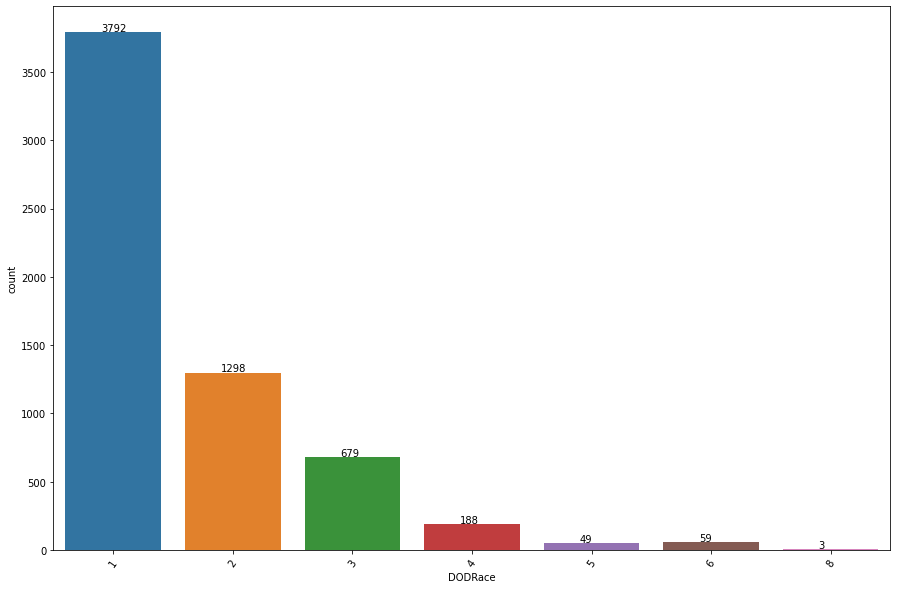

In [23]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y) 
for i in ax.patches:
    ax.annotate((i.get_height()), (i.get_x()+0.3,i.get_height()+8)); #target control
plt.xticks(rotation=55) 

In [24]:
df.shape

(6068, 109)

In [25]:
df["DODRace"]. value_counts() 

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [26]:
df.drop(df[df.DODRace.map(lambda x: (x == 4) or (x == 5) or (x == 6) or (x == 7) or (x == 8))].index,axis=0,inplace=True) 
# We Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [27]:
df["DODRace"].value_counts() 

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [28]:
df.shape

(5769, 109)

In [29]:
y = df.DODRace

In [30]:
len(y)

5769

In [31]:
drop_list =[]
for col in df:
    if df[col].isnull().sum()>1500:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)

        
drop_list
# we drop columns if high null ( subjectid  and Ethnicity, )

subjectid = 1870
Ethnicity = 4644
SubjectId = 3899


['subjectid', 'Ethnicity', 'SubjectId']

In [32]:
df.drop(drop_list, axis=1, inplace=True)

In [33]:
df.corr()["DODRace"]

abdominalextensiondepthsitting   -0.031860
acromialheight                   -0.217393
acromionradialelength            -0.158561
anklecircumference               -0.157784
axillaheight                     -0.205576
balloffootcircumference          -0.111249
balloffootlength                 -0.059867
biacromialbreadth                -0.113701
bicepscircumferenceflexed        -0.031438
bicristalbreadth                 -0.203874
bideltoidbreadth                 -0.070197
bimalleolarbreadth               -0.107319
bitragionchinarc                  0.083263
bitragionsubmandibulararc        -0.024195
bizygomaticbreadth                0.032559
buttockcircumference             -0.025066
buttockdepth                     -0.001344
buttockheight                    -0.098933
buttockkneelength                -0.066708
buttockpopliteallength           -0.043794
calfcircumference                -0.091895
cervicaleheight                  -0.215708
chestbreadth                     -0.155248
chestcircum

In [34]:
df.shape

(5769, 106)

In [35]:
df.isnull().sum().any()

False

In [36]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 106 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

In [37]:
df.drop(["PrimaryMOS","Date","Installation","Component","Branch","WritingPreference","Heightin","Weightlbs"],axis=1,inplace=True) 

In [38]:
df.shape

(5769, 98)

<AxesSubplot:xlabel='DODRace'>

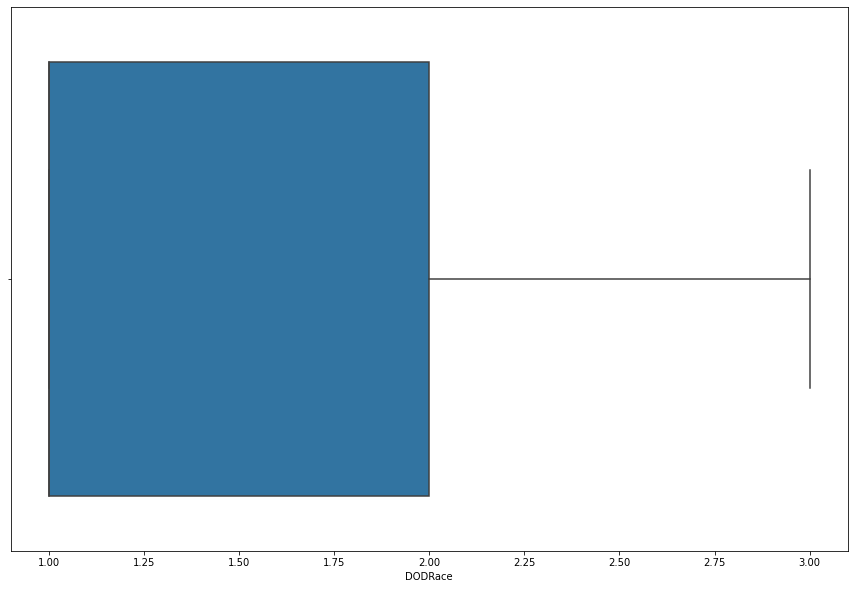

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(df.DODRace)

<AxesSubplot:xlabel='DODRace', ylabel='Age'>

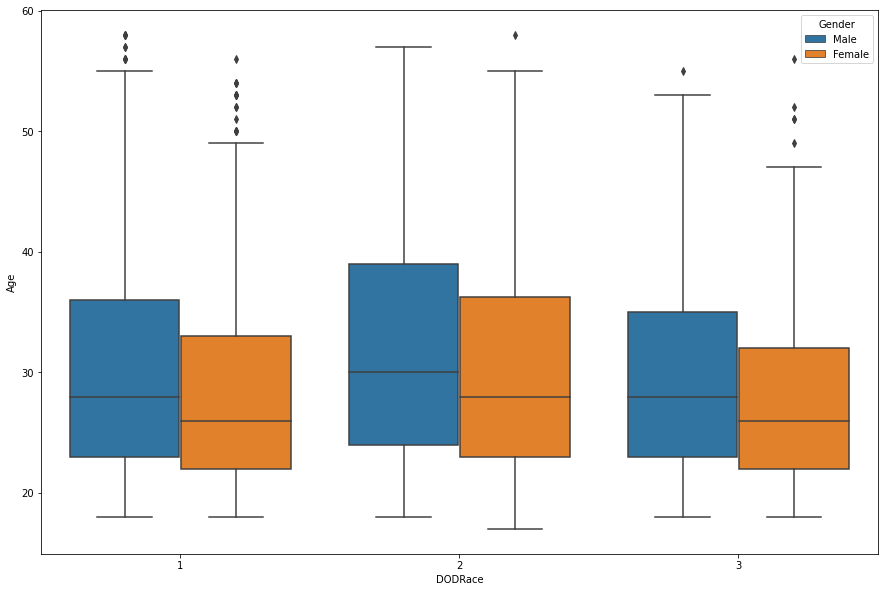

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x=y,y="Age",hue="Gender",data=df)

In [41]:
df=pd.get_dummies(df)

In [42]:
df.shape

(5769, 234)

In [63]:
df.head(5).T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356
bicristalbreadth,274,257,261,262,263


In [51]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 233 columns):
 #    Column                                        Dtype
---   ------                                        -----
 0    abdominalextensiondepthsitting                int64
 1    acromialheight                                int64
 2    acromionradialelength                         int64
 3    anklecircumference                            int64
 4    axillaheight                                  int64
 5    balloffootcircumference                       int64
 6    balloffootlength                              int64
 7    biacromialbreadth                             int64
 8    bicepscircumferenceflexed                     int64
 9    bicristalbreadth                              int64
 10   bideltoidbreadth                              int64
 11   bimalleolarbreadth                            int64
 12   bitragionchinarc                              int64
 13   bitragionsubmand

In [53]:
y

0       1
1       1
2       2
3       1
4       2
       ..
6063    3
6064    3
6065    2
6066    3
6067    3
Name: DODRace, Length: 5769, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [54]:
X = df

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [65]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 233)
Train target shape   :  (4615,)
Test features shape  :  (1154, 233)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [67]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [68]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[652  16  90]
 [ 10 236  14]
 [ 23   9 104]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.90      0.91      0.91       260
           3       0.50      0.76      0.60       136

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2623   63  348]
 [  27  972   39]
 [  67   19  457]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.54      0.84      0.66       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [73]:
scoring = {"f1_3Race" : make_scorer(f1_score, average = None, labels =[3]),
           "precision_3Race" : make_scorer(precision_score, average = None, labels =[3]),
           "recall_3Race" : make_scorer(recall_score, average = None, labels =[3])}

In [74]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
#cross validate
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_3Race           0.603571
test_precision_3Race    0.494466
test_recall_3Race       0.777104
dtype: float64

### Logistic Model GridsearchCV

In [75]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=[3])

In [76]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [77]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [78]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=3)

In [79]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [80]:
log_model_grid.best_score_

0.7753143051308188

In [81]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[652  16  90]
 [ 10 236  14]
 [ 23   9 104]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.90      0.91      0.91       260
           3       0.50      0.76      0.60       136

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2623   63  348]
 [  27  972   39]
 [  67   19  457]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.54      0.84      0.66       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



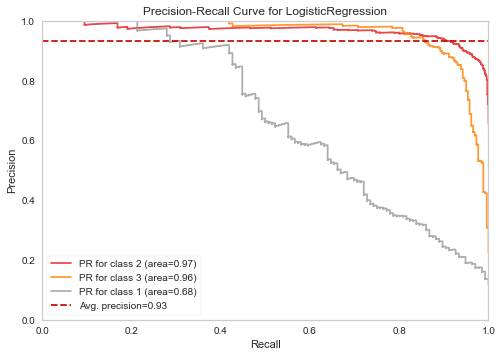

In [82]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [2, 3, 1],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [83]:
viz.score_

{2: 0.9674347249270632,
 3: 0.9591727623281042,
 1: 0.6760307371767137,
 'micro': 0.9310733217521368}

In [85]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_[3] 
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___